In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Q1</h1>


In [ ]:
# Reading Data
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/TaxiData.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


Missing Values in Each Column:
 pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64


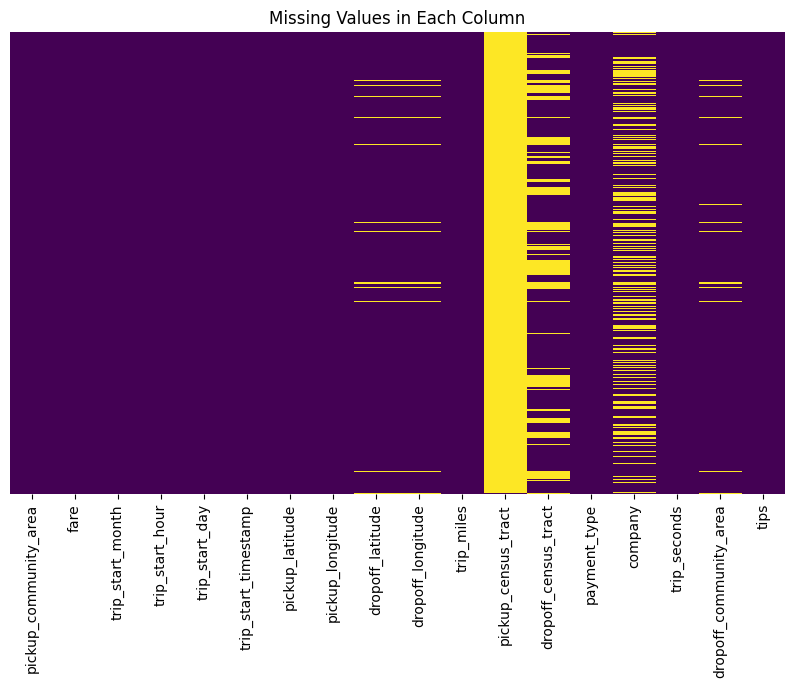

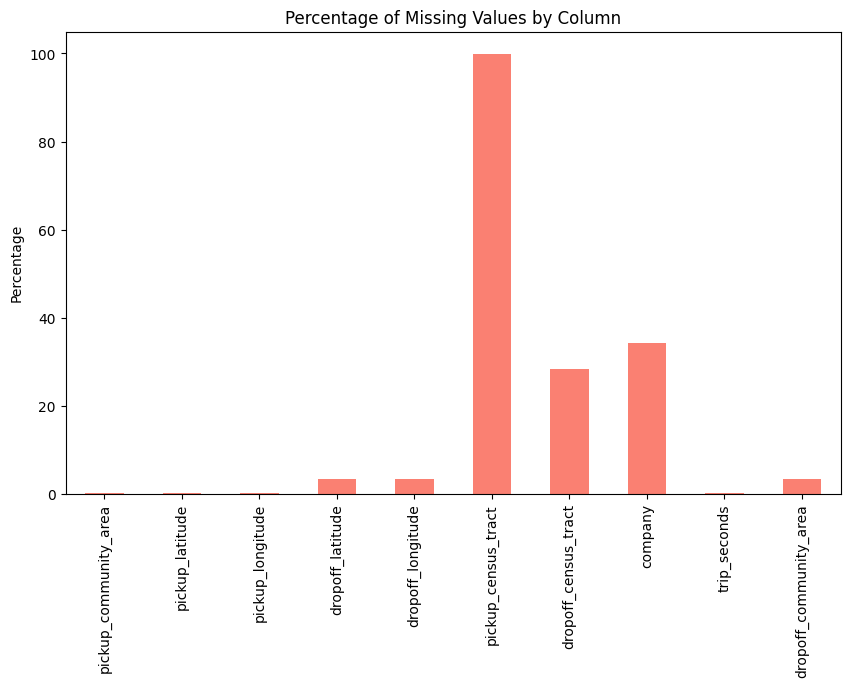

Remaining Missing Values in Each Column After Imputation:
 pickup_community_area     0
fare                      0
trip_start_month          0
trip_start_hour           0
trip_start_day            0
trip_start_timestamp      0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
trip_miles                0
pickup_census_tract       0
dropoff_census_tract      0
payment_type              0
company                   0
trip_seconds              0
dropoff_community_area    0
tips                      0
dtype: int64


<ipython-input-4-ff2854dcffe0>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_seconds'].fillna(df['trip_seconds'].mean(), inplace=True)
<ipython-input-4-ff2854dcffe0>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# 1. Categorize Columns: Define columns as categorical, numerical, or mixed
categorical_cols = ['pickup_community_area', 'trip_start_month', 'trip_start_hour', 'trip_start_day',
                    'payment_type', 'company', 'dropoff_community_area']
numerical_cols = ['fare', 'trip_miles', 'trip_seconds', 'tips',
                  'pickup_latitude', 'pickup_longitude',
                  'dropoff_latitude', 'dropoff_longitude']
mixed_cols = ['trip_start_timestamp', 'pickup_census_tract', 'dropoff_census_tract']

# 2. Type Conversion: Convert columns to appropriate types

# Converting categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Converting numerical columns to appropriate numeric types
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Converting timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], unit='s', errors='coerce')

# 3. Identify Missing Values: Check for missing values and visualize them

missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values in Each Column")
plt.show()

# Bar chart to show the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='salmon')
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage")
plt.show()

# 4. Handling Missing Values: Impute or drop missing values based on column type

# Numerical columns: Impute with mean
df['trip_seconds'].fillna(df['trip_seconds'].mean(), inplace=True)

# Categorical columns: Impute with mode (most frequent value)
df['pickup_community_area'].fillna(df['pickup_community_area'].mode()[0], inplace=True)
df['dropoff_community_area'].fillna(df['dropoff_community_area'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

# Mixed columns (e.g., Census Tracts): Impute with mode
df['pickup_census_tract'].fillna(df['pickup_census_tract'].mode()[0], inplace=True)
df['dropoff_census_tract'].fillna(df['dropoff_census_tract'].mode()[0], inplace=True)

# Geolocation Columns: impute with mode
df['pickup_latitude'].fillna(df['pickup_latitude'].mode()[0], inplace=True)
df['pickup_longitude'].fillna(df['pickup_longitude'].mode()[0], inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mode()[0], inplace=True)
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mode()[0], inplace=True)

# Final check for remaining missing values
print("Remaining Missing Values in Each Column After Imputation:\n", df.isnull().sum())

<h1>Q2 A</h1>

<ipython-input-5-dacd4b85bcac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trip_start_hour', palette='viridis')


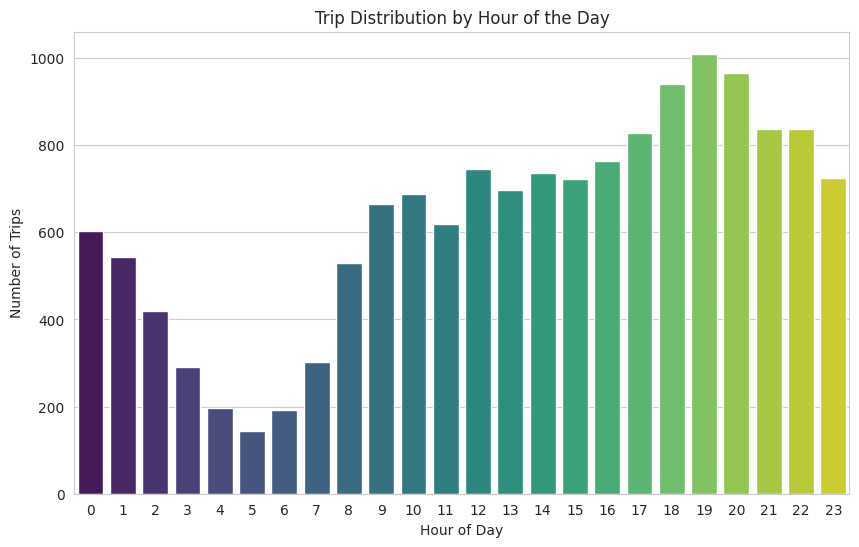

<ipython-input-5-dacd4b85bcac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trip_start_day', palette='magma')


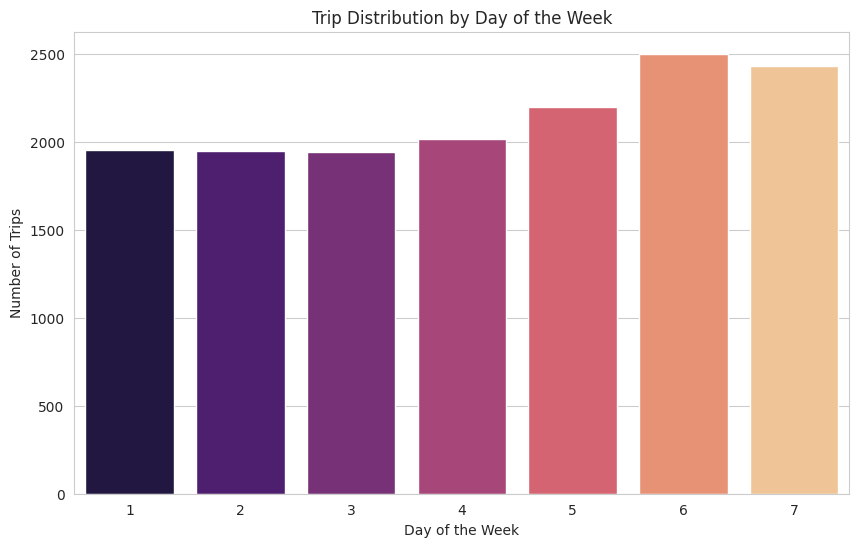

<ipython-input-5-dacd4b85bcac>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trip_start_month', palette='coolwarm')


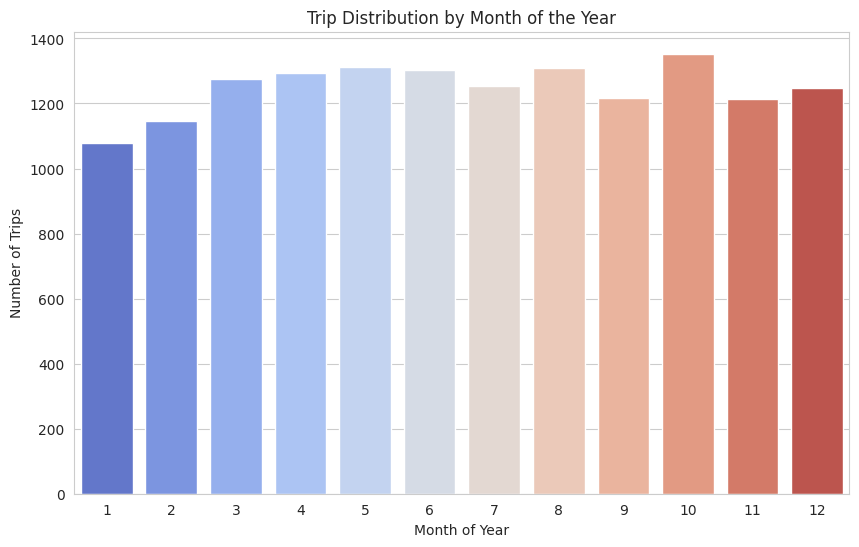

In [ ]:
sns.set_style("whitegrid")

# (1) Bar chart for Hours of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_start_hour', palette='viridis')
plt.title("Trip Distribution by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

# (2) Bar chart for Days of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_start_day', palette='magma')
plt.title("Trip Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.show()

# (3) Bar chart for Months of the Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_start_month', palette='coolwarm')
plt.title("Trip Distribution by Month of the Year")
plt.xlabel("Month of Year")
plt.ylabel("Number of Trips")
plt.show()

<h1> Q2 B (a)<h1>

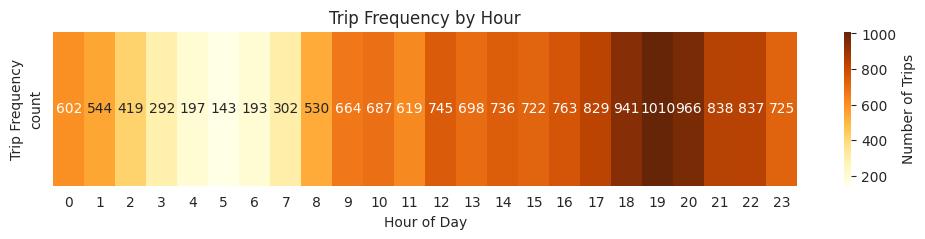

In [ ]:
hourly_trip_counts = df['trip_start_hour'].value_counts().sort_index()

hourly_trip_counts_df = hourly_trip_counts.to_frame().T

# Plot the heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(hourly_trip_counts_df, cmap='YlOrBr', annot=True, fmt="d", cbar_kws={'label': 'Number of Trips'})
plt.title("Trip Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Frequency")
plt.show()


<h1>Q2 B (b) </h1>

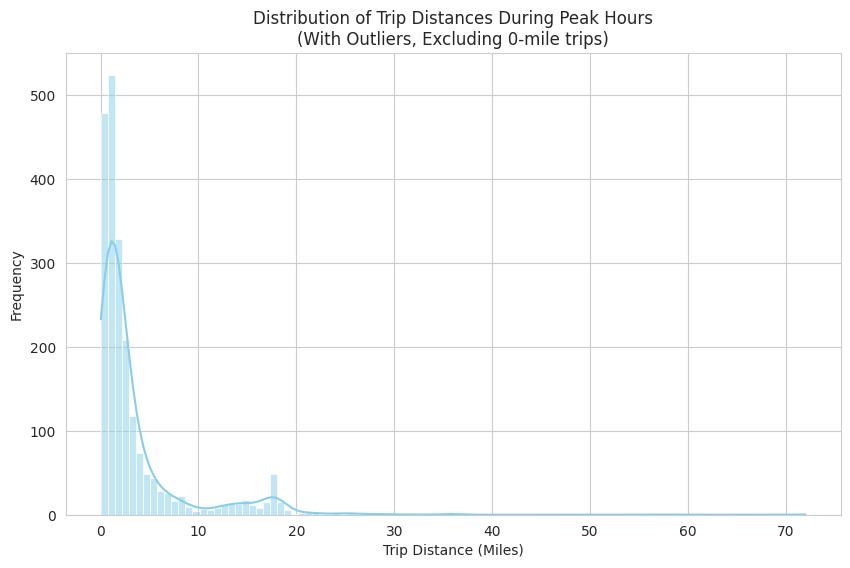

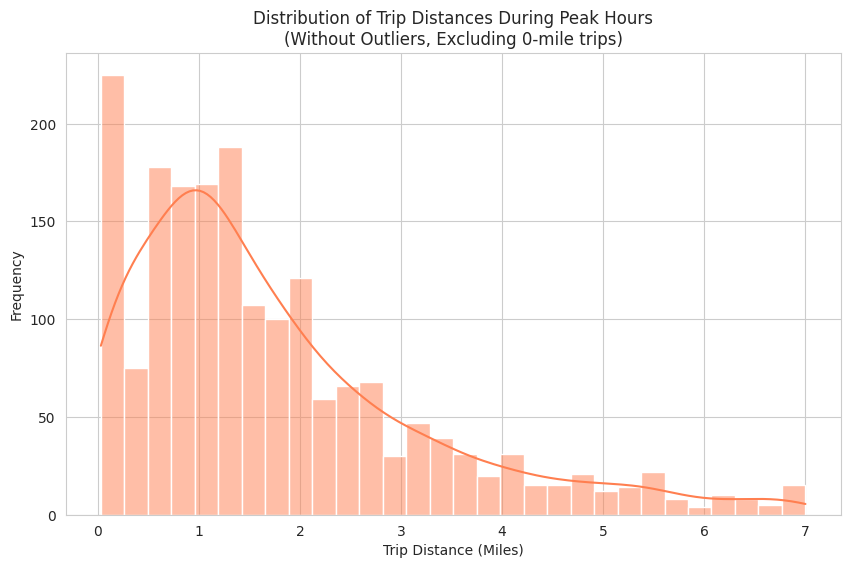

In [ ]:
# Identify peak hours
peak_hours = [18, 19, 20]

# Filter the DataFrame for trips within peak hours and exclude 0-mile trips
peak_hour_trips = df[
    (df['trip_start_hour'].isin(peak_hours)) &
    (df['trip_miles'] > 0)  # Exclude 0-mile trips
]

# Calculate the IQR to identify outliers
Q1 = peak_hour_trips['trip_miles'].quantile(0.25)
Q3 = peak_hour_trips['trip_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
peak_hour_trips_no_outliers = peak_hour_trips[
    (peak_hour_trips['trip_miles'] >= lower_bound) &
    (peak_hour_trips['trip_miles'] <= upper_bound)
]

# Plotting histogram for trip distances with outliers
plt.figure(figsize=(10, 6))
sns.histplot(peak_hour_trips['trip_miles'], bins=100, kde=True, color="skyblue")
plt.title("Distribution of Trip Distances During Peak Hours\n(With Outliers, Excluding 0-mile trips)")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Frequency")
plt.show()

# Plotting histogram for trip distances without outliers
plt.figure(figsize=(10, 6))
sns.histplot(peak_hour_trips_no_outliers['trip_miles'], bins=30, kde=True, color="coral")
plt.title("Distribution of Trip Distances During Peak Hours\n(Without Outliers, Excluding 0-mile trips)")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Frequency")
plt.show()

<h1> Q2 C (a) </h1>

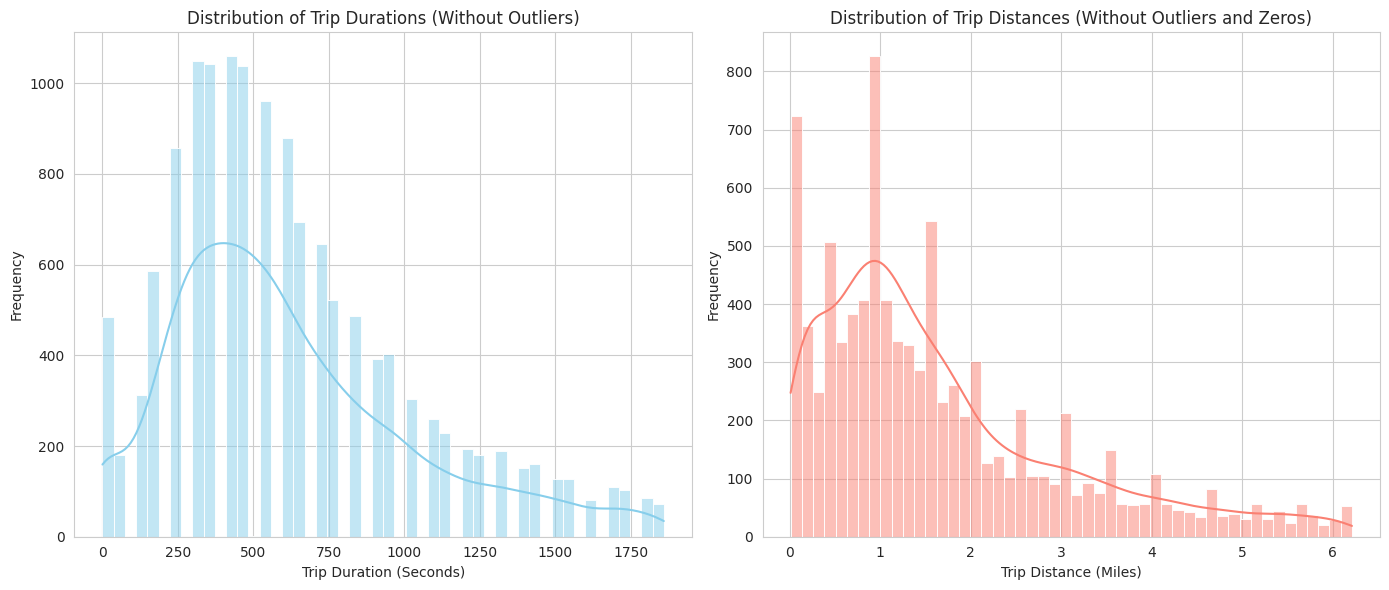

In [ ]:
# Remove zeros from trip distance before plotting
df_distance_no_outliers_nonzero = df_distance_no_outliers[df_distance_no_outliers['trip_miles'] > 0]

# Plot histograms for trip duration and trip distance without outliers and zero trip distances
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_duration_no_outliers['trip_seconds'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Trip Durations (Without Outliers)")
plt.xlabel("Trip Duration (Seconds)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df_distance_no_outliers_nonzero['trip_miles'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Trip Distances (Without Outliers and Zeros)")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


<h1>Q2 C (b) </h1>

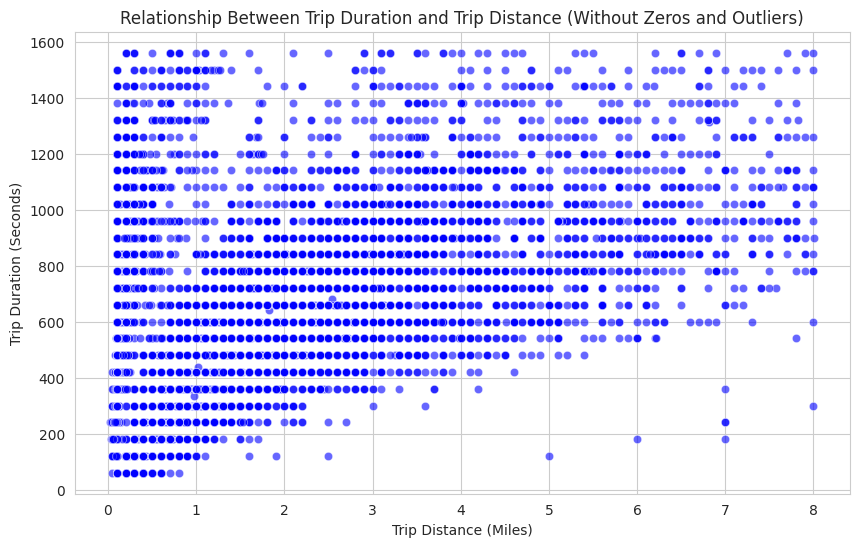

In [ ]:
# Define function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove zeros and outliers for both trip duration and trip distance
df_no_zeros = df[(df['trip_miles'] > 0) & (df['trip_seconds'] > 0)]
df_no_outliers_miles = remove_outliers(df_no_zeros, 'trip_miles')
df_no_outliers_duration = remove_outliers(df_no_outliers_miles, 'trip_seconds')

# Scatter plot to show the relationship between trip duration and trip distance (without zeros and outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers_duration, x='trip_miles', y='trip_seconds', color='blue', alpha=0.6)
plt.title("Relationship Between Trip Duration and Trip Distance (Without Zeros and Outliers)")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Trip Duration (Seconds)")
plt.show()


<h1>Q2 D</h1>

<ipython-input-25-ad2721667425>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df_no_outliers.groupby('trip_start_month').agg({'trip_start_timestamp': 'count', 'trip_miles': 'mean'})


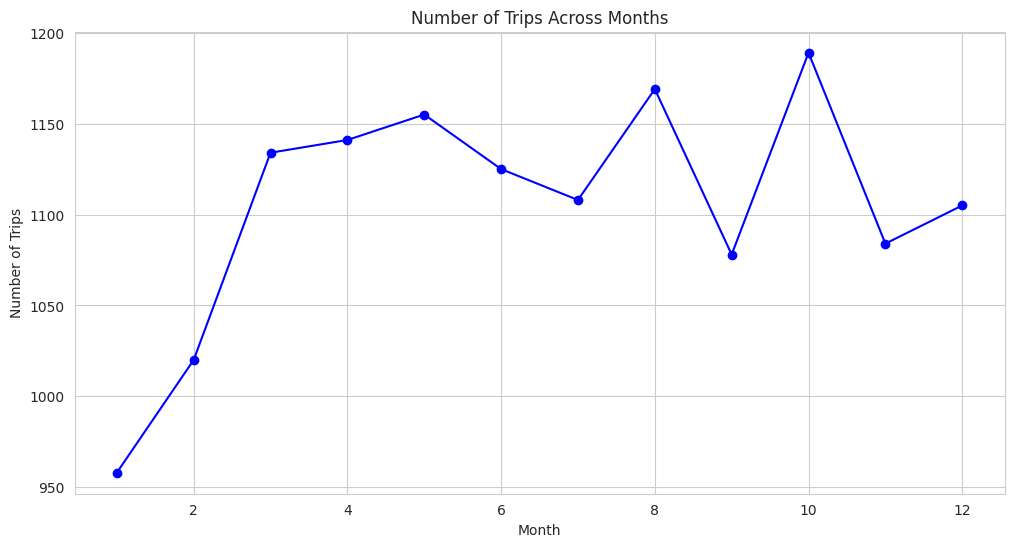

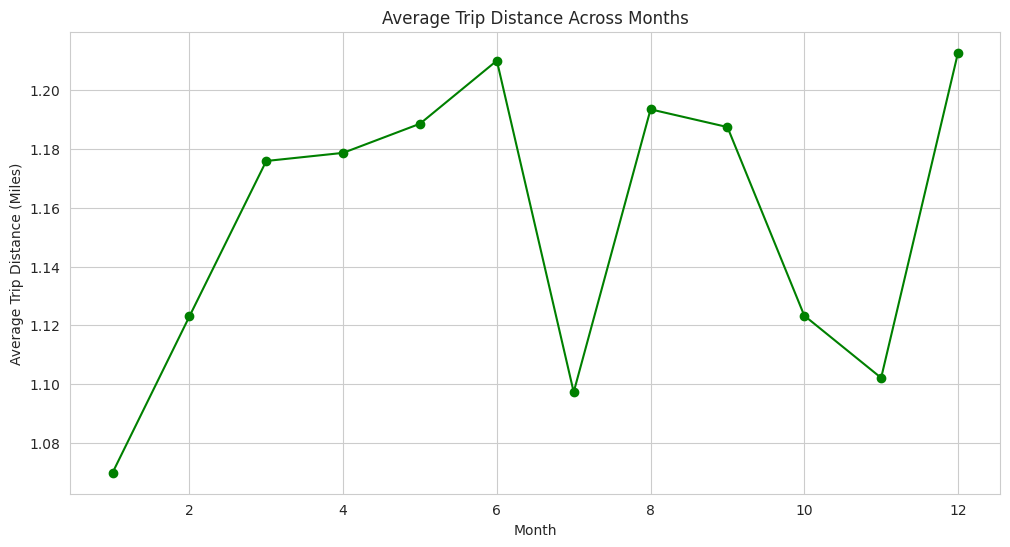

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for trip distance
df_no_outliers = remove_outliers(df, 'trip_miles')

# Group data by month and calculate the number of trips and average trip distance
monthly_data = df_no_outliers.groupby('trip_start_month').agg({'trip_start_timestamp': 'count', 'trip_miles': 'mean'})
monthly_data = monthly_data.rename(columns={'trip_start_timestamp': 'Number of Trips', 'trip_miles': 'Average Trip Distance'})

# Plot 1: Number of Trips Across Months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Number of Trips'], marker='o', color='blue', label='Number of Trips')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Across Months')
plt.grid(True)
plt.show()

# Plot 2: Average Trip Distance Across Months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Average Trip Distance'], marker='o', color='green', label='Average Trip Distance')
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (Miles)')
plt.title('Average Trip Distance Across Months')
plt.grid(True)
plt.show()


<h1> Q2 E </h1>

<ipython-input-26-3b4bd38fdcbe>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg_distance = df_no_outliers.groupby('trip_start_hour')['trip_miles'].mean()


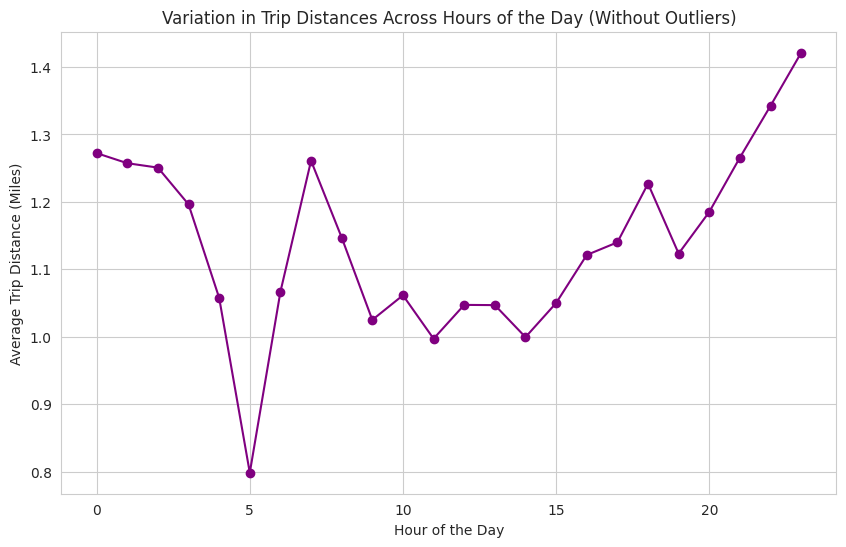

In [ ]:
# Define function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for trip distance
df_no_outliers = remove_outliers(df, 'trip_miles')
hourly_avg_distance = df_no_outliers.groupby('trip_start_hour')['trip_miles'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_distance.index, hourly_avg_distance.values, color='purple', marker='o')
plt.title('Variation in Trip Distances Across Hours of the Day (Without Outliers)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (Miles)')
plt.grid(True)
plt.show()
